Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used       

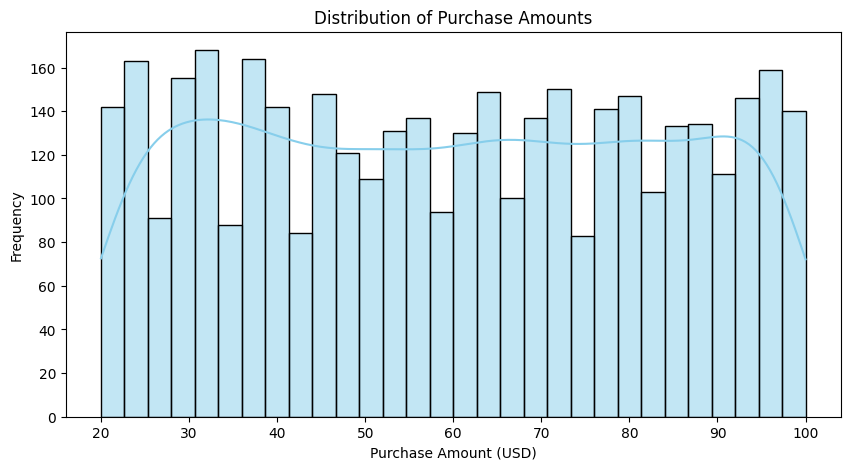

<ipython-input-3-015c18fea225>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')


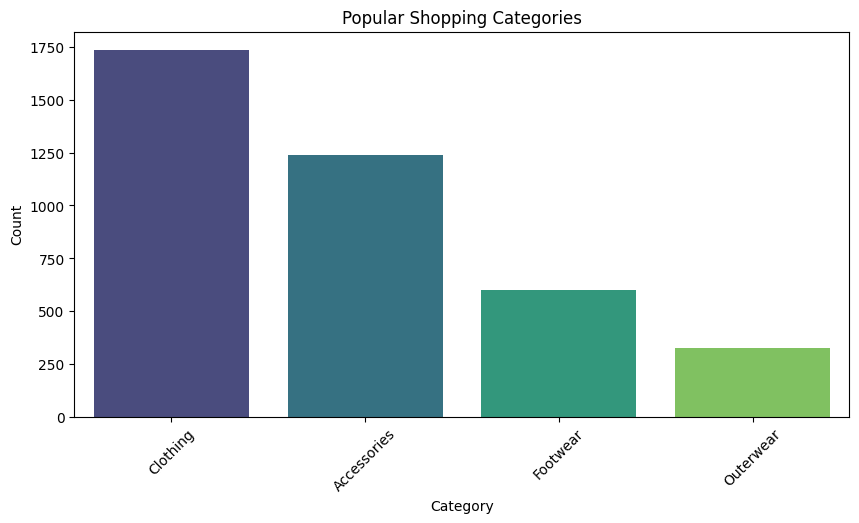

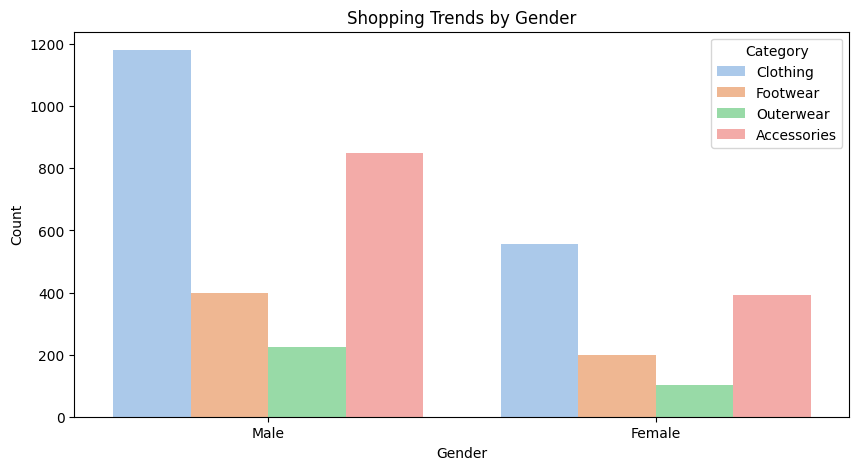

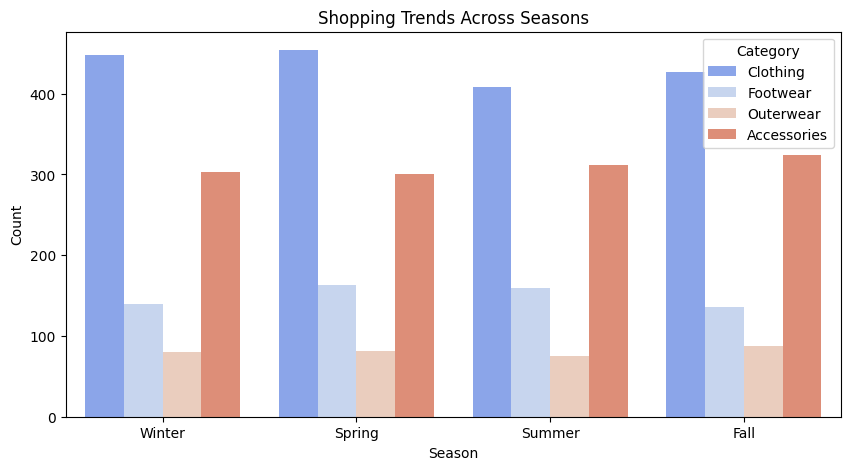

Column name corrected to: Payment Method


<ipython-input-3-015c18fea225>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=payment_column, order=df[payment_column].value_counts().index, palette='muted')


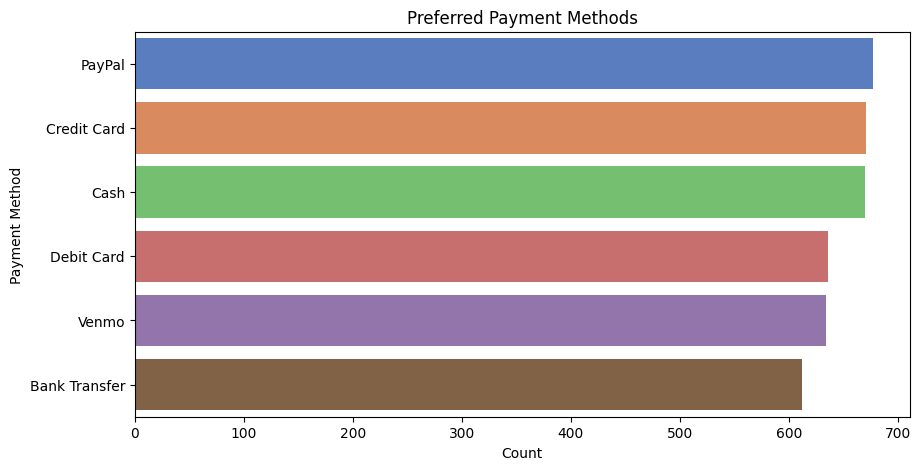

Analysis Completed!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/shopping_trends_dataset 1.csv"
df = pd.read_csv(file_path)

# Display basic info
def data_overview():
    print("Dataset Overview:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())

data_overview()

# Data Cleaning: Drop duplicates and fill missing values
df.drop_duplicates(inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Exploratory Data Analysis (EDA)
def purchase_trends():
    plt.figure(figsize=(10,5))
    sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Purchase Amounts')
    plt.xlabel('Purchase Amount (USD)')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
    plt.title('Popular Shopping Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='Gender', hue='Category', palette='pastel')
    plt.title('Shopping Trends by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

purchase_trends()

# Trends based on Season
def season_trends():
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='Season', hue='Category', palette='coolwarm')
    plt.title('Shopping Trends Across Seasons')
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.show()

season_trends()

# Payment method preferences
def payment_trends():
    # Check for column name variations and correct if necessary
    payment_column = 'Preferred Payment Method'
    if payment_column not in df.columns:
        # Try variations like "preferred_payment_method", "payment_method", etc.
        for col in df.columns:
            if 'payment' in col.lower():
                payment_column = col
                print(f"Column name corrected to: {payment_column}")
                break
        else:
            raise KeyError(f"No column related to 'payment' found in the DataFrame.")

    plt.figure(figsize=(10,5))
    sns.countplot(data=df, y=payment_column, order=df[payment_column].value_counts().index, palette='muted')
    plt.title('Preferred Payment Methods')
    plt.xlabel('Count')
    plt.ylabel('Payment Method')
    plt.show()

payment_trends()

print("Analysis Completed!")